# Document Topic Segmentation

This notebook demonstrates how to group news articles by topic (e.g., politics, sports, technology) using clustering on word embeddings or TF-IDF features.

## 1. Import Required Libraries
Import libraries such as pandas, scikit-learn, NLTK or spaCy, matplotlib, and any embedding models.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Uncomment below if using spaCy or gensim for embeddings
# import spacy
# import gensim.downloader as api
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pravi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pravi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pravi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2. Load and Preprocess Text Data
Load a dataset of news articles and preprocess the text (tokenization, stopword removal, lowercasing).

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pravi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# Example: Load a larger, more realistic set of news articles
news_data = [
    "The government passed a new law to improve education standards.",
    "The football team won the championship after a thrilling match.",
    "Tech companies are investing heavily in artificial intelligence.",
    "Elections are coming up next month in several states.",
    "A new smartphone model was released with advanced features.",
    "The tennis player broke the world record in the finals.",
    "Political leaders debate climate change policies at the summit.",
    "Stock markets hit record highs as investors remain optimistic.",
    "Scientists discover a new species in the Amazon rainforest.",
    "The local basketball team secures a spot in the playoffs.",
    "Government announces new healthcare reforms for rural areas.",
    "Major breakthrough in cancer research reported by medical journal.",
    "Tech startups compete to develop the next big social media app.",
    "International cricket match draws huge crowds in Mumbai.",
    "Education ministry launches scholarship program for underprivileged students.",
    "Apple unveils its latest iPhone with improved camera technology.",
    "Political unrest leads to protests in the capital city.",
    "Football legend announces retirement after two decades.",
    "Scientists warn about the rapid melting of polar ice caps.",
    "Basketball championship final ends in dramatic overtime victory.",
    "Government increases funding for renewable energy projects.",
    "Tech giants face antitrust investigations in multiple countries.",
    "Medical experts recommend new guidelines for heart health.",
    "Cricket team celebrates historic win against rivals.",
    "Education experts discuss the impact of online learning platforms.",
    "Tennis tournament attracts top players from around the world.",
    "Political parties prepare for upcoming national elections.",
    "New study links air pollution to respiratory diseases.",
    "Social media trends influence consumer buying behavior.",
    "Healthcare workers honored for their service during the pandemic."
]

# Preprocess text: lowercasing, simple whitespace tokenization, stopword removal
def preprocess(text):
    stop_words = set([
        'the', 'a', 'an', 'and', 'or', 'to', 'in', 'of', 'for', 'on', 'with', 'is', 'are', 'was', 'were', 'by', 'at', 'as', 'from', 'that', 'this', 'it', 'be', 'has', 'had', 'but', 'after', 'next', 'up', 'new', 'he', 'she', 'they', 'their', 'his', 'her', 'its', 'will', 'would', 'can', 'could', 'should', 'may', 'might', 'do', 'does', 'did', 'so', 'such', 'if', 'then', 'than', 'which', 'who', 'whom', 'what', 'when', 'where', 'why', 'how'
    ])
    tokens = text.lower().split()
    filtered = [w.strip('.,!?') for w in tokens if w.isalpha() and w not in stop_words]
    return ' '.join(filtered)

preprocessed_data = [preprocess(doc) for doc in news_data]
print(preprocessed_data)

['government passed law improve education', 'football team won championship thrilling', 'tech companies investing heavily artificial', 'elections coming month several', 'smartphone model released advanced', 'tennis player broke world record', 'political leaders debate climate change policies', 'stock markets hit record highs investors remain', 'scientists discover species amazon', 'local basketball team secures spot', 'government announces healthcare reforms rural', 'major breakthrough cancer research reported medical', 'tech startups compete develop big social media', 'international cricket match draws huge crowds', 'education ministry launches scholarship program underprivileged', 'apple unveils latest iphone improved camera', 'political unrest leads protests capital', 'football legend announces retirement two', 'scientists warn about rapid melting polar ice', 'basketball championship final ends dramatic overtime', 'government increases funding renewable energy', 'tech giants face an

## 3. Feature Extraction with TF-IDF
Transform the preprocessed text data into TF-IDF feature vectors using scikit-learn's TfidfVectorizer.

In [15]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_data)
print('TF-IDF feature shape:', tfidf_matrix.shape)
print('TF-IDF feature names:', vectorizer.get_feature_names_out())

TF-IDF feature shape: (30, 141)
TF-IDF feature names: ['about' 'advanced' 'against' 'air' 'amazon' 'announces' 'antitrust'
 'apple' 'around' 'artificial' 'attracts' 'basketball' 'big'
 'breakthrough' 'broke' 'buying' 'camera' 'cancer' 'capital' 'celebrates'
 'championship' 'change' 'climate' 'coming' 'companies' 'compete'
 'consumer' 'cricket' 'crowds' 'debate' 'develop' 'discover' 'discuss'
 'dramatic' 'draws' 'during' 'education' 'elections' 'ends' 'energy'
 'experts' 'face' 'final' 'football' 'funding' 'giants' 'government'
 'guidelines' 'healthcare' 'heart' 'heavily' 'highs' 'historic' 'hit'
 'honored' 'huge' 'ice' 'impact' 'improve' 'improved' 'increases'
 'influence' 'international' 'investigations' 'investing' 'investors'
 'iphone' 'latest' 'launches' 'law' 'leaders' 'leads' 'learning' 'legend'
 'links' 'local' 'major' 'markets' 'match' 'media' 'medical' 'melting'
 'ministry' 'model' 'month' 'multiple' 'national' 'online' 'overtime'
 'parties' 'passed' 'player' 'players' 'polar'

## 4. Feature Extraction with Word Embeddings
Generate document-level embeddings using pre-trained word embeddings (e.g., averaging GloVe or Word2Vec vectors).

In [ ]:
# Example: Use spaCy for word embeddings (can use GloVe, Word2Vec, etc.)
# Uncomment below if spaCy is installed and model is downloaded
# import spacy
# nlp = spacy.load('en_core_web_md')
# def get_embedding(text):
#     return nlp(text).vector
# embeddings = np.array([get_embedding(doc) for doc in preprocessed_data])
# print('Embeddings shape:', embeddings.shape)

# For demonstration, use TF-IDF features for clustering below

## 5. Clustering Documents by Topic
Apply clustering algorithms (e.g., KMeans) to group documents into topics using the extracted features.

In [16]:
# Apply KMeans clustering to TF-IDF features
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(tfidf_matrix)
print('Cluster assignments:', labels)

Cluster assignments: [0 2 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 2 0 2 0 0 0 2 0 0 0 0 1 0]


## 6. Visualize Cluster Assignments
Visualize the clustering results using dimensionality reduction (e.g., PCA or t-SNE) and matplotlib.

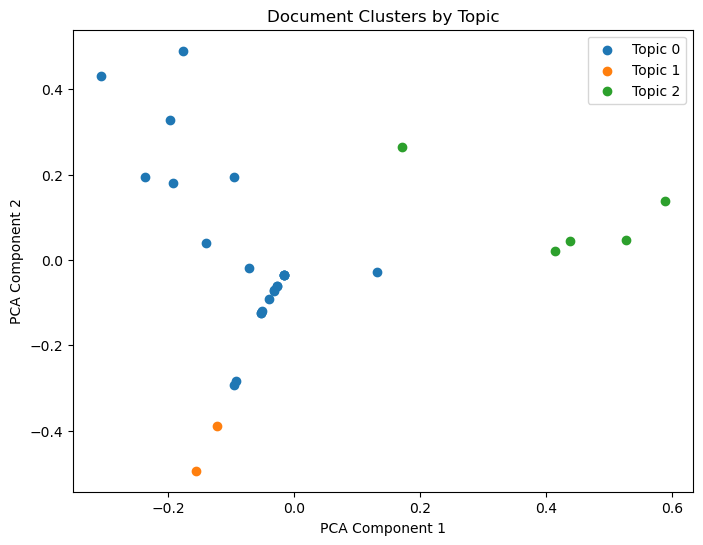

In [17]:
# Reduce TF-IDF features to 2D for visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(8,6))
for i in range(num_clusters):
    plt.scatter(reduced[labels == i, 0], reduced[labels == i, 1], label=f'Topic {i}')
plt.title('Document Clusters by Topic')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

## 7. Evaluate Topic Segmentation
Assess the quality of topic segmentation using metrics such as silhouette score or by inspecting top terms per cluster.

In [18]:
# Silhouette Score
score = silhouette_score(tfidf_matrix, labels)
print('Silhouette Score:', score)

# Top terms per cluster
def get_top_terms_per_cluster(kmeans, vectorizer, n_terms=5):
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    for i in range(num_clusters):
        print(f"\nTopic {i} top terms:")
        top_terms = [terms[ind] for ind in order_centroids[i, :n_terms]]
        print(', '.join(top_terms))

get_top_terms_per_cluster(kmeans, vectorizer)

Silhouette Score: 0.01782987479084303

Topic 0 top terms:
government, political, education, healthcare, scientists

Topic 1 top terms:
social, media, consumer, influence, trends

Topic 2 top terms:
team, football, championship, basketball, won


In [19]:
# Assign cluster names based on top terms
cluster_names = []
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :5]]
    # Use the most relevant top term as cluster name
    cluster_names.append(top_terms[0].capitalize() + " Topic")

# Map each label to its cluster name
doc_clusters = [cluster_names[label] for label in labels]

# Save to CSV
import pandas as pd
output_df = pd.DataFrame({
    'sentence': news_data,
    'cluster': doc_clusters
})
output_df.to_csv('document_clusters.csv', index=False)
print(output_df.head())
print("Saved as document_clusters.csv")

                                            sentence           cluster
0  The government passed a new law to improve edu...  Government Topic
1  The football team won the championship after a...        Team Topic
2  Tech companies are investing heavily in artifi...  Government Topic
3  Elections are coming up next month in several ...  Government Topic
4  A new smartphone model was released with advan...  Government Topic
Saved as document_clusters.csv
